# **HCIA-AI Linear regression lab**

Домашнее задание

Выполнила:

Куроедова Александра, ИКБО-04-20 (ИЭП-04-20)

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.pink()

import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge 
from sklearn.metrics import r2_score, mean_absolute_error

<Figure size 720x540 with 0 Axes>

In [ ]:
import seaborn as sns

## Посмотрим на данные

In [ ]:
data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
data_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

print(data_train.shape, data_test.shape)

(17000, 9) (3000, 9)


## Будем предсказывать последний столбец **median_house_value**

In [ ]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Все столбцы численные, не нужно делать one-hot-encoding

In [ ]:
data_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
data_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Проверим наличие nan'ов

их нет, предобработка не нужна

In [ ]:
np.array(np.sum(data_train.isna())), np.array(np.sum(data_test.isna()))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

## Корелляции

In [ ]:
col_names = data_train.describe().columns
col_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
data_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [ ]:
from seaborn import palettes

In [ ]:
def correlation_map(data, column_names):
    f, ax = plt.subplots(figsize=(10, 10))  # размер ячейки
    sns.heatmap(data[column_names].corr(), 
                cmap = sns.color_palette("coolwarm", as_cmap=True),
                vmin=-1, vmax=1,
                annot=True, linewidths=.8, fmt= '.3f') # отобр-ть числа, ширина 8, 3 знака после запятой
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

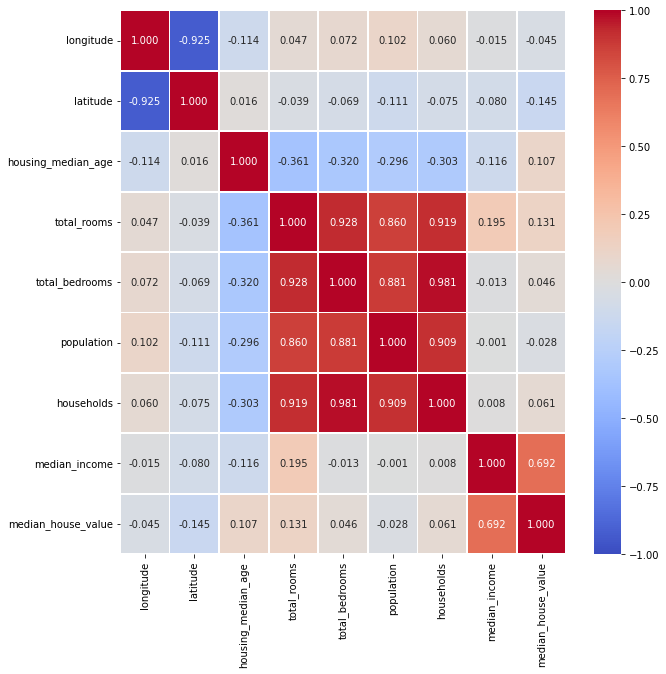

In [ ]:
correlation_map(data_train, col_names)

### Это были корреляции всех признаков со всеми, теперь выделим только для искомого признака

In [ ]:
mhv_corr = data_train.corr().iloc[:, -1]

In [ ]:
mhv_corr = mhv_corr.sort_values() 
mhv_corr

latitude             -0.144917
longitude            -0.044982
population           -0.027850
total_bedrooms        0.045783
households            0.061031
housing_median_age    0.106758
total_rooms           0.130991
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
def correlation_for_y(data, column_names):

    mhv_corr = data[column_names].corr().iloc[:, -1]
    sorted_corr = mhv_corr.sort_values()
    print(sorted_corr)
    print()
    mhv_corr = sorted_corr.to_frame()

    f, ax = plt.subplots(figsize=(3, 10))  # размер ячейки
    sns.heatmap(mhv_corr, 
                cmap = sns.color_palette("coolwarm", as_cmap=True),
                vmin=-1, vmax=1,
                # cbar_ax = f.add_axes(),
                cbar=True,
                cbar_kws={'shrink': 5.3},
                annot=True, linewidths=.8, fmt= '.3f') # отобр-ть числа, ширина 8, 3 знака после запятой
    return plt

latitude             -0.144917
longitude            -0.044982
population           -0.027850
total_bedrooms        0.045783
households            0.061031
housing_median_age    0.106758
total_rooms           0.130991
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

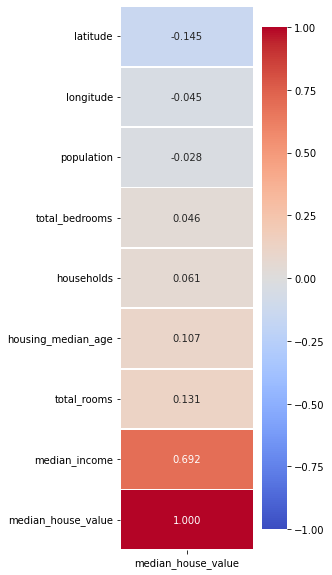

In [ ]:
correlation_for_y(data_train, col_names)

### От модели не стоит ожидать результата выше 0.7, судя по этим корреляциям.

## Подготовим X и y.

In [ ]:
predictors_labels = col_names[:-1]
prediction_name = col_names[-1]

In [ ]:
predictors_labels[::-1]

Index(['median_income', 'households', 'population', 'total_bedrooms',
       'total_rooms', 'housing_median_age', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
X_train = data_train[predictors_labels]
y_train = data_train[prediction_name]
X_test = data_test[predictors_labels]
y_test = data_test[prediction_name]

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17000, 8) (17000,) (3000, 8) (3000,)


In [ ]:
np.sum(X_train.isna())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
np.sum(X_test.isna())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

## Обучение

In [ ]:
model_lm = LinearRegression()    
model_lm.fit(X_train, y_train) 

print("Coefficients weights: ", model_lm.coef_, "\n")
print("R2 on train sample is", model_lm.score(X_train, y_train))

Coefficients weights:  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04] 

R2 on train sample is 0.6413378529502687


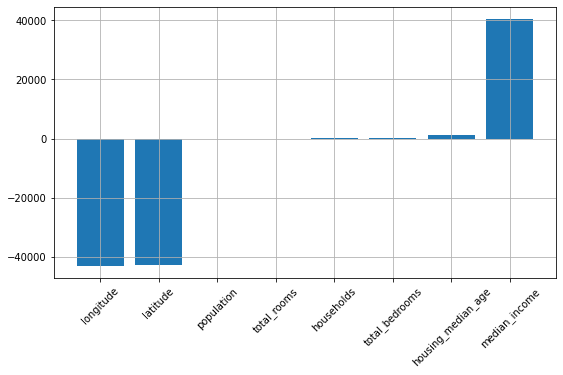

In [ ]:
plt.figure(figsize = (9, 5))
model_coeffs = pd.Series(data = model_lm.coef_, index=predictors_labels)
plt.bar(x = model_coeffs.sort_values().axes[0], height = model_coeffs.sort_values())

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.show()

In [ ]:
preds = model_lm.predict(X_test)

R2_real = r2_score(y_test, preds)
print(f"R2_real = {R2_real}")

MAE_real = mean_absolute_error(y_test, preds)
print(f"MAE_real = {MAE_real}")

R2_real = 0.6195057678312047
MAE_real = 50352.22825794297


## Графики соответствия предсказаний к правильному результату

In [ ]:
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.pink()


<Figure size 720x540 with 0 Axes>

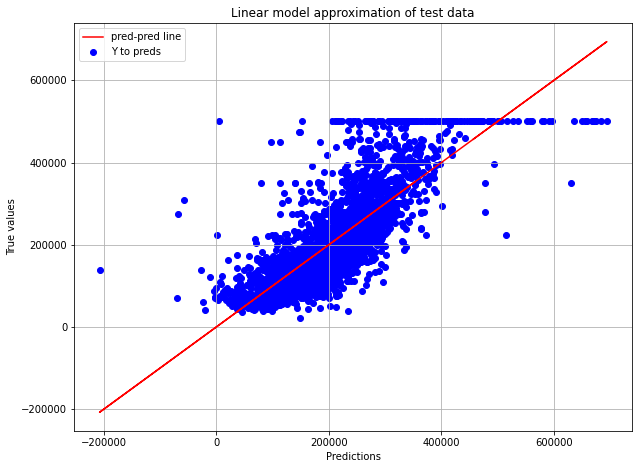

In [ ]:
plt.scatter(preds, y_test, c = 'b', label = 'Y to preds')
plt.plot(preds, preds, c = 'r', label = 'pred-pred line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data")
plt.legend()
plt.show()

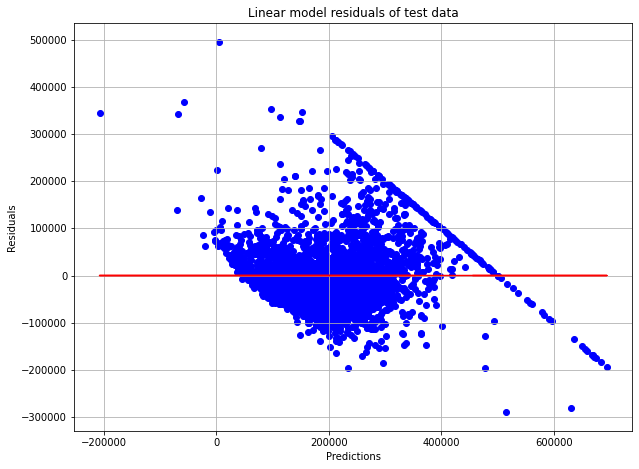

In [ ]:
plt.scatter(preds, y_test - preds, c = 'b')
plt.plot(preds, np.zeros_like(preds), c = 'r')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Linear model residuals of test data")
plt.show()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17000, 8) (17000,) (3000, 8) (3000,)


### Сначала будем добавлять все признаки в порядке по умолчанию

In [ ]:
seed=123
test_ratio = 0.2

r2_history_train = []
r2_history_test = []
pred_names = []
preds_y = []
models = []
predictors = np.arange(1, len(mhv_corr))

for predictor_name in predictors_labels[::]:
    pred_names.append(predictor_name)

    X_train, y_train = data_train[pred_names], data_train[prediction_name]
    X_test, y_test =  data_test[pred_names], data_test[prediction_name]

    model_lm = LinearRegression()
    model_lm.fit(X_train, y_train)
    
    preds = model_lm.predict(X_test)
    models.append(model_lm)
    
    preds_y.append(preds)
    r2_history_train.append(model_lm.score(X_train, y_train))
    r2_history_test.append(model_lm.score(X_test, y_test))

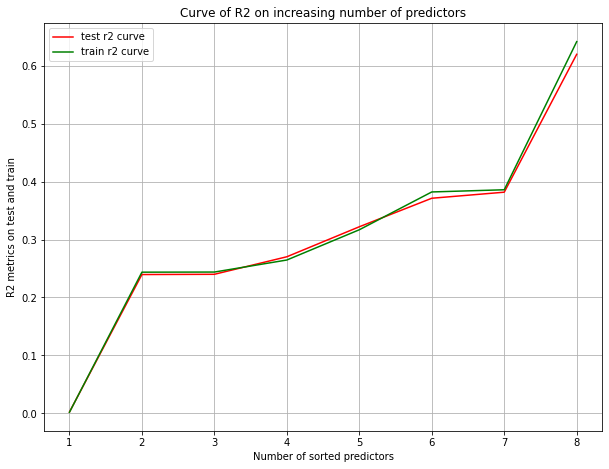

In [ ]:
plt.plot(predictors, r2_history_test, c = "r", label = 'test r2 curve')
plt.plot(predictors, r2_history_train, c = "g", label = 'train r2 curve')
plt.xlabel("Number of sorted predictors")
plt.ylabel("R2 metrics on test and train")
plt.title("Curve of R2 on increasing number of predictors")
plt.legend()

### А теперь в порядке убывания модуля корреляции

In [ ]:
seed=123
test_ratio = 0.2

r2_history_train = []
r2_history_test = []
pred_names = []
preds_y = []
models = []
predictors = np.arange(1, len(mhv_corr))

sorted_labels = sorted(predictors_labels, key=lambda x: abs(mhv_corr[x]), reverse=True)
print(sorted_labels)

for predictor_name in sorted_labels:
    pred_names.append(predictor_name)

    X_train, y_train = data_train[pred_names], data_train[prediction_name]
    X_test, y_test =  data_test[pred_names], data_test[prediction_name]

    model_lm = LinearRegression()
    model_lm.fit(X_train, y_train)
    
    preds = model_lm.predict(X_test)
    models.append(model_lm)
    
    preds_y.append(preds)
    r2_history_train.append(model_lm.score(X_train, y_train))
    r2_history_test.append(model_lm.score(X_test, y_test))

['median_income', 'latitude', 'total_rooms', 'housing_median_age', 'households', 'total_bedrooms', 'longitude', 'population']


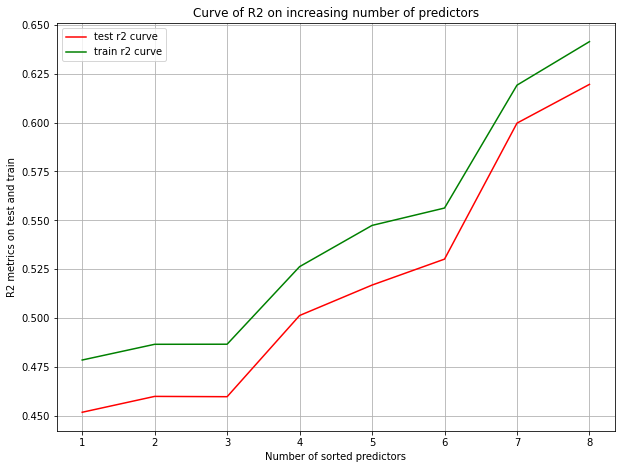

In [ ]:
plt.plot(predictors, r2_history_test, c = "r", label = 'test r2 curve')
plt.plot(predictors, r2_history_train, c = "g", label = 'train r2 curve')
plt.xlabel("Number of sorted predictors")
plt.ylabel("R2 metrics on test and train")
plt.title("Curve of R2 on increasing number of predictors")
plt.legend()

## Lasso

In [ ]:
X_train = data_train[predictors_labels]
y_train = data_train[prediction_name]
X_test = data_test[predictors_labels]
y_test = data_test[prediction_name]

In [ ]:
model_LASSO_cv = LassoCV(eps = 0.00001, n_alphas = 10000, cv = 4, random_state = seed)
model_LASSO_cv.fit(X_train, y_train)

LassoCV(cv=4, eps=1e-05, n_alphas=10000, random_state=123)

In [ ]:
model_LASSO_cv.score(X_train, y_train), model_LASSO_cv.score(X_test, y_test)

(0.6411850817406658, 0.6195134795920774)

In [ ]:
lasso_preds = model_LASSO_cv.predict(X_test)
MAE_lasso_dummies = mean_absolute_error(y_test, lasso_preds)
MAE_lasso_dummies

50323.58549486315

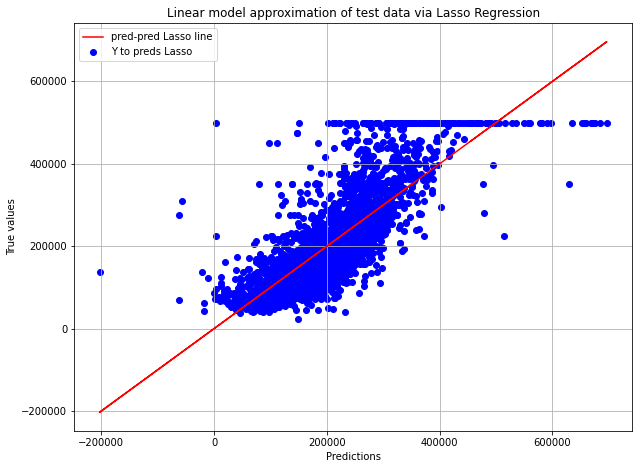

In [ ]:
plt.scatter(lasso_preds, y_test, c = 'b', label = 'Y to preds Lasso')
plt.plot(lasso_preds, lasso_preds, c = 'r', label = 'pred-pred Lasso line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Lasso Regression")
plt.legend()
plt.show()

## Ridge

In [ ]:
model_RIDGE_cv = RidgeCV(alphas = np.linspace(9, 11, 300), cv = 4)
model_RIDGE_cv.fit(X_train, y_train)
model_RIDGE_cv.best_score_

0.5541989772650854

In [ ]:
model_RIDGE_cv.alpha_

11.0

In [ ]:
model_RIDGE_cv.score(X_train, y_train), model_RIDGE_cv.score(X_test, y_test)

(0.6413374397968883, 0.6195140724113433)

In [ ]:
ridge_preds = model_RIDGE_cv.predict(X_test)
MAE_ridge_dummies = mean_absolute_error(y_test, ridge_preds)
MAE_ridge_dummies

50349.94492591544

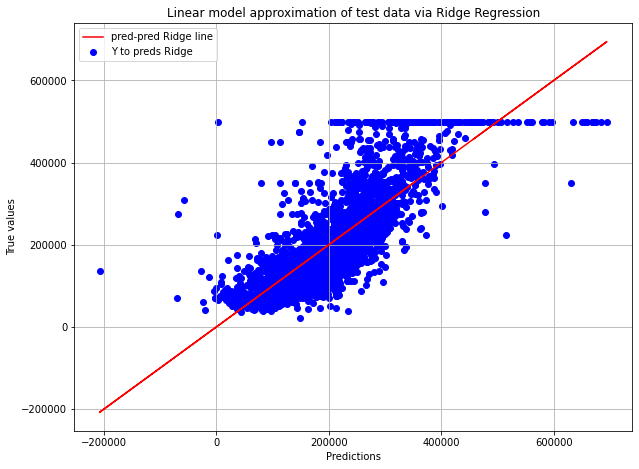

In [ ]:
plt.scatter(ridge_preds, y_test, c = 'b', label = 'Y to preds Ridge')
plt.plot(ridge_preds, ridge_preds, c = 'r', label = 'pred-pred Ridge line')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Linear model approximation of test data via Ridge Regression")
plt.legend()
plt.show()

## Итог

In [ ]:
print("Средняя абсолютная ошибка по линейной модели с числовыми предикторами", MAE_real)
print("Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами", MAE_lasso_dummies)
print("Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами", MAE_ridge_dummies)

Средняя абсолютная ошибка по линейной модели с числовыми предикторами 50352.22825794297
Средняя абсолютная ошибка по линейной модели с Lasso и числовыми + категориальными предикторами 50323.58549486315
Средняя абсолютная ошибка по линейной модели с Ridge и числовыми + категориальными предикторами 50349.94492591544


Макс полученная точность: **0.62**